<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/AI_HW_3_Linear_Regression_with_Normalization_and_code_to_find_w_and_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np

In [92]:
# Generate random data for demonstration
TRUE_SLOPE = 1.75
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


#Start your code below here

In [93]:
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [94]:
# Split the data into training (80%) and testing (20%) sets
TEST_SIZE_PERCENT = 0.2
test_start_index = int((1-TEST_SIZE_PERCENT) * len(X)) #from 80% index to 100% index (20% total) for testing
X_train = X[:test_start_index]
X_test = X[test_start_index:]
y_train = y[:test_start_index]
y_test = y[test_start_index:]


In [95]:
def z_score_normalize_features(X_train, X_test):

    mean_X = np.mean(X_train, axis=0)
    std_X = np.std(X_train, axis=0)

    X_normalized_train = (X_train - mean_X) / std_X
    X_normalized_test = (X_test - mean_X) / std_X

    return X_normalized_train, X_normalized_test, mean_X, std_X


In [96]:
X_train, X_test, mean_X, std_X = z_score_normalize_features(X_train, X_test)

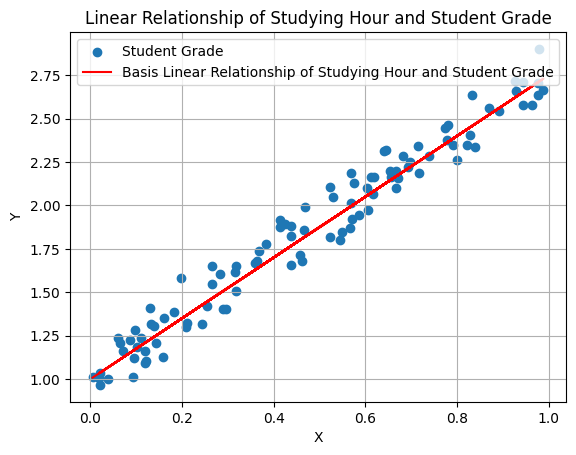

In [97]:
# Plot the data points
plt.scatter(X, y, label='Student Grade')

# Plot the basis linear relationship
y_line = TRUE_SLOPE * X + TRUE_INTERCEPT
plt.plot( X, y_line, color='red',
         #linewidth=1,
         label='Basis Linear Relationship of Studying Hour and Student Grade')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Relationship of Studying Hour and Student Grade')
plt.grid(True)
plt.show()

In [98]:
def linear_regression_nonvectorized_1D(x, y, learning_rate, epochs, early_stop=False, cost_improvement_threshold = 1e-5):

    # INITIALIZE VARIABLES
    # Initialize the coefficients (weights) with zeros
    w = 0.0  # w (slope)
    b = 0.0  # b (intercept)
    # Initialize with a large value
    prev_cost = float('inf')
    # Create list to store cost values throughout training for plotting
    cost_history = []

    # Get the number of samples m
    m = len(X_train)

    # Perform gradient descent EPOCH times to find the optimal w & b
    for epoch in range(epochs):
        dw = 0.0    # Initialize dJ/dw for this epoch
        db = 0.0    # Initialize dJ/db for this epoch
        cost = 0.0  # Initialize cost for this epoch

        # Sum gradients, dJ/dw and dJ/db, and costs over number of samples
        for i in range(m):
            # Compute loss or error for data point i
            error = w*x[i] + b - y[i]
            # Add the cost for data point i to the total
            cost += error**2
            # Compute gradients for w & b at point i
            dw += x[i] * error # dJ/dw
            db += error # dJ/db

        # Divide respective sums by number of samples
        dw /= m  # dw = dw / m
        db /= m  # db = db / m
        cost /= (2*m)  # cost = cost / (2*m)

        # Update w & b for next epoch
        w -= learning_rate * dw  # w = w - LEARNING_RATE*dw
        b -= learning_rate * db  # b = b - LEARNING_RATE*db

        # Append the cost to the history
        cost_history.append(cost)

        # Check for early stopping based on cost improvement
        if early_stop:
            if prev_cost - cost < cost_improvement_threshold:
              break
        prev_cost = cost

    return w, b, cost_history


In [99]:
# Grid Search for optimal learning rate and epochs
learning_rates = [0.01, 0.1, 0.3, 0.5]
epochs_list = [50, 100, 200, 500]
best_mse = float('inf')
best_params = None
best_w = None
best_b = None
best_cost_history = None
best_training_time = 0

for lr in learning_rates:
    for epochs in epochs_list:
        start_time = time.time()
        w, b, cost_history = linear_regression_nonvectorized_1D(X_train, y_train, learning_rate=lr, epochs=epochs, early_stop=True)
        end_time = time.time()
        training_time = end_time - start_time
        y_pred = w * X_test + b
        mse = mean_squared_error(y_test, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_params = {'learning_rate': lr, 'epochs': epochs}
            best_w = w
            best_b = b
            best_cost_history = cost_history
            best_training_time = training_time

# Use best parameters to train and evaluate the model
w, b, cost_history = best_w, best_b, best_cost_history
y_pred = w * X_test + b


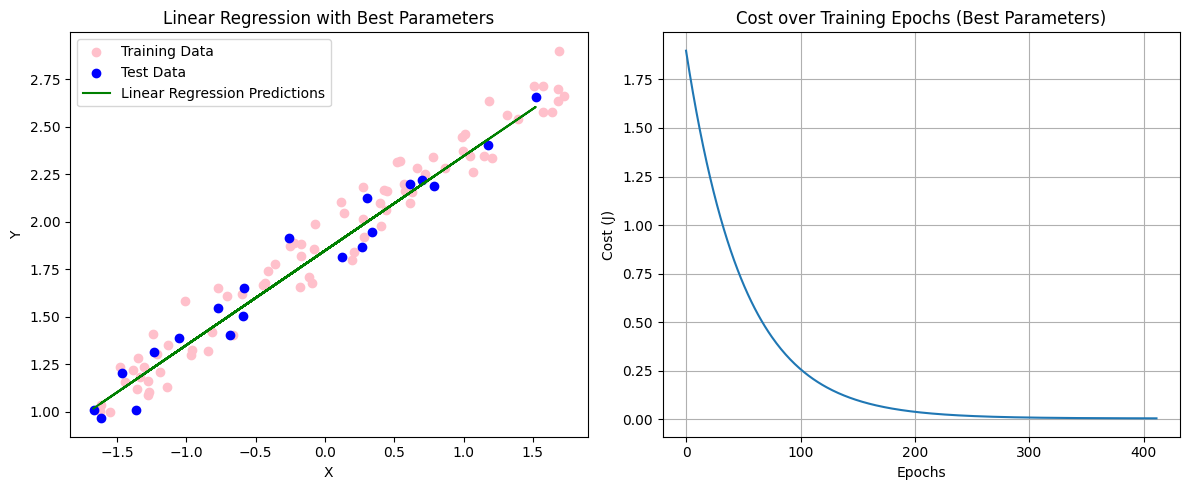

Best Parameters: {'learning_rate': 0.01, 'epochs': 500}
Best MSE: 0.008462800868638376
Best Model Slope (w): [0.4970042]
Best Model Intercept (b): [1.84896064]
Training Time: 0.26 seconds
Training Epochs: 412
R-squared (R^2) Score: 0.9634337146867467


In [100]:
# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='pink', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='Linear Regression Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression with Best Parameters')

plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost over Training Epochs (Best Parameters)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print training outcomes
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)
print("Best Model Slope (w):", w)
print("Best Model Intercept (b):", b)
print(f"Training Time: {best_training_time:.2f} seconds")
print("Training Epochs:", len(cost_history))
print("R-squared (R^2) Score:", r2_score(y_test, y_pred))
